___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. 
____
We'll focus on bank stocks and see how they progressed throughout the Covid-19 pandemic times all the way to 2022.

## Getting the Data

In this section pandas has been used to directly read data from Google finance!

First we need to start with the proper imports.

*Note: [We need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows us to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html)*

### The Imports

In [5]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [34]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** The stock data from Jan 1st 2018 to Dec 31st 2021 for each of these banks. 
Setting each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Using datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. 
Here yahoo finance has been used as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'yahoo', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "yahoo" MAY NOT ALWAYS WORK. 
------------

In [12]:
start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2022, 1, 1)

In [13]:
# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)

# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

In [15]:
#OR (for a panel of objects):
df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'yahoo', start, end)

**Creating a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [16]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

**Using pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks.**

In [17]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

**Setting the column name levels:**

In [18]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

**Checking the head of the bank_stocks dataframe.**

In [22]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2018-01-02   29.900000  29.610001  29.750000  29.900000  57121600.0   
2018-01-03   29.940001  29.690001  29.900000  29.799999  57865700.0   
2018-01-04   30.440001  29.879999  29.969999  30.190001  76512500.0   
2018-01-05   30.420000  30.049999  30.370001  30.330000  56445200.0   
2018-01-08   30.270000  30.049999  30.230000  30.120001  42914800.0   

Bank Ticker                     C                                   ...  \
Stock Info   Adj Close       High        Low       Open      Close  ...   
Date                                                                ...   
2018-01-02   26.805145  75.180000  74.019997  75.089996  74.360001  ...   
2018-01-03   26.715494  74.739998  73.970001  74.349998  74.589996  ...   
2018-01-04   27.065128  76.110001  74.660004  75.010002  75.510002  ...   
2018-01-05   27.190639  75.769997  74.959999  75.709999  75.410004  ...   
2018-01-08   27.002371  75.239998  74.330002  75.169998  74.529999  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2018-01-02   52.759998  52.189999  6644600.0  45.447464  61.360001  60.700001   
2018-01-03   52.299999  52.330002  6955500.0  45.569374  61.770000  61.099998   
2018-01-04   52.799999  53.130001  8678800.0  46.266018  63.049999  61.910000   
2018-01-05   53.200001  53.110001  6476000.0  46.248608  62.810001  62.090000   
2018-01-08   52.930000  52.889999  6681400.0  46.057018  62.730000  61.939999   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2018-01-02   61.040001  61.090000  13819300.0  52.880005  
2018-01-03   61.220001  61.560001  14203700.0  53.286842  
2018-01-04   61.980000  62.330002  18740500.0  53.953354  
2018-01-05   62.759998  62.750000  14217900.0  54.316898  
2018-01-08   62.660000  62.040001  15569400.0  53.702328  

[5 rows x 36 columns]

# EDA

Let's explore the data a bit! 

**What is the max Close price for each bank's stock throughout the time period?**

.xs() returns cross-section from the Series/DataFrame.

In [27]:
bank_stocks.xs(level='Stock Info',key='Close',axis=1).max()

Bank Ticker
BAC     48.369999
C       81.910004
GS     423.850006
JPM    171.779999
MS     105.449997
WFC     65.930000
dtype: float64

** Creating a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [29]:
returns=pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. pct_change() calculates the % change between the current and a prior element.**

**Creating a for loop that for each Bank Stock Ticker creates returns column and sets it as a column in the returns DataFrame.**

In [31]:
for i in tickers:
    returns[i]=bank_stocks[i]['Close'].pct_change()

In [32]:
returns.head()

,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,-0.003344,0.003093,-0.009309,0.001019,0.002683,0.007694
2018-01-04,0.013087,0.012334,0.013976,0.009069,0.015288,0.012508
2018-01-05,0.004637,-0.001324,-0.005101,-0.006420,-0.000376,0.006738
2018-01-08,-0.006924,-0.011670,-0.014519,0.001477,-0.004142,-0.011315


**Creating a pairplot using seaborn of the returns dataframe.**

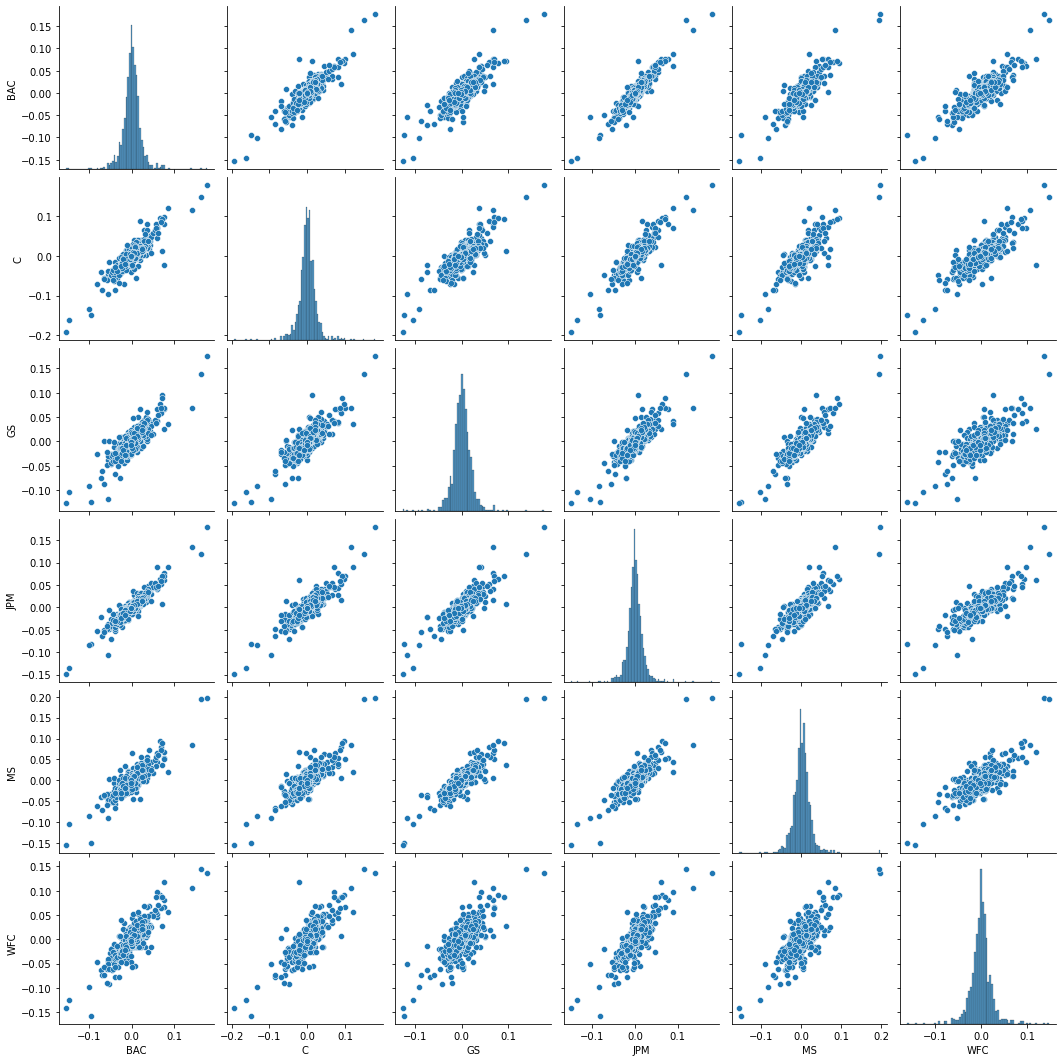

In [42]:
sns.pairplot(returns[1:])

**What dates each bank stock had the best and worst single day returns.**

In [47]:
# worst drop
returns.idxmin()

BAC   2020-03-16
C     2020-03-16
GS    2020-03-16
JPM   2020-03-16
MS    2020-03-16
WFC   2020-03-12
dtype: datetime64[ns]

 5 of the banks share the same day for the worst drop, did anything significant happen that day?
 https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7343658/
 The day has been marked as **black monday** because of the stock market crash due to Covid-19.

In [48]:
#best single day gain
returns.idxmax()

BAC   2020-03-13
C     2020-03-13
GS    2020-03-13
JPM   2020-03-13
MS    2020-03-13
WFC   2020-03-24
dtype: datetime64[ns]

**Which stock would you classify as the riskiest over the entire time period?**

In [50]:
returns.std() #citi group is the riskiest

BAC    0.022810
C      0.025219
GS     0.021361
JPM    0.020560
MS     0.022874
WFC    0.024077
dtype: float64

**Riskiest stock for 2021?**

In [57]:
returns['2021-1-1':'2021-12-31'].std() #wells fargo

BAC    0.016056
C      0.016366
GS     0.015857
JPM    0.013441
MS     0.016402
WFC    0.021178
dtype: float64

**Creating a distplot using seaborn of the 2021 returns for Wells Fargo **

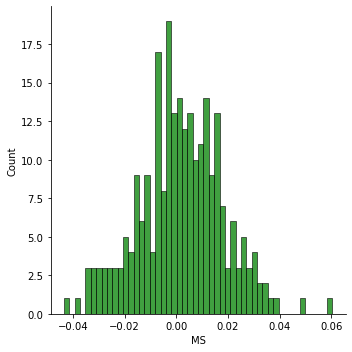

In [76]:
sns.displot(returns['2021-1-1':'2021-12-31']['MS'],color='green',bins=50)

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [16]:
import plotly
import cufflinks as cf
cf.go_offline()

**Creating a line plot showing Close price for each bank for the entire index of time.**

In [97]:
bank_stocks.xs(level='Stock Info',key='Close',axis=1).iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2020. 

**Plotting the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2020**

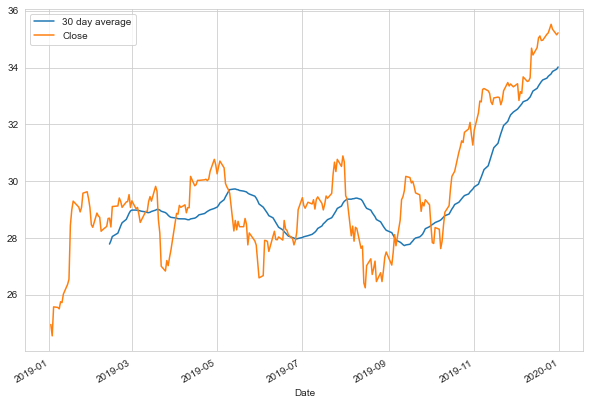

In [107]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
BAC['Close']['2019-1-1':'2020-1-1'].rolling(window=30).mean().plot(label='30 day average')
BAC['Close']['2019-1-1':'2020-1-1'].plot()
plt.legend()

**Creating a heatmap of the correlation between the stocks Close Price.**

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

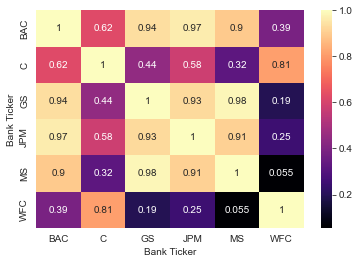

In [115]:
sns.heatmap(bank_stocks.xs(level='Stock Info',key='Close',axis=1).corr(),annot=True,cmap='magma')

**Using clustermap to cluster the correlations together:**

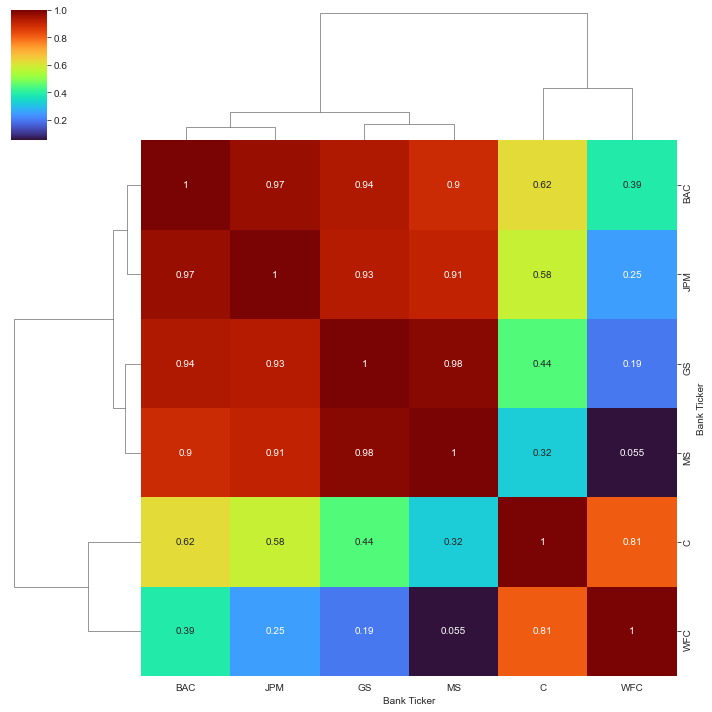

In [124]:
sns.clustermap(bank_stocks.xs(level='Stock Info',key='Close',axis=1).corr(),annot=True,cmap='turbo')

# Technocal Analysis Plots

This part of the project is experimental due to its heavy reliance on the cuffinks project.

**Creating a candle plot of Bank of America's stock from Jan 1st 2018 to Jan 1st 2019.**

In [134]:
BAC[['Open', 'High', 'Low', 'Close']]['2018-01-01':'2019-01-01'].iplot(kind='candle')

**creating a Simple Moving Averages plot of Goldman Sachs for the year 2018.**

In [136]:
GS['Close']['2018-01-01':'2019-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

**Creating a Bollinger Band Plot for Bank of America for the year 2018.**

In [137]:
BAC['Close']['2018-01-01':'2019-01-01'].ta_plot(study='boll')

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.